# <font color = 'Purple'> 1. Import required libraries and read the provided dataset (youtube_dislike_dataset.csv) and retrieve top 5 and bottom 5 records.</font>



In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [103]:
data=pd.read_csv('youtube_dislike_dataset.csv')   #reading data from file
print("The first 5 records of the dataset \n \n",data.head())   #diplaying the head
print("\n \n \n The last 5 records of the dataset \n \n", data.tail())   #displaying the tail

The first 5 records of the dataset 
 
       video_id                                       title  \
0  --0bCF-iK2E        Jadon Sancho  Magical Skills & Goals   
1  --14w5SOEUs          Migos - Avalanche (Official Video)   
2  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys   
3  --4tfbSyYDE     JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO   
4  --DKkzWVh-E                Why Retaining Walls Collapse   

                 channel_id          channel_title         published_at  \
0  UC6UL29enLNe4mqwTfAyeNuw             Bundesliga  2021-07-01 10:00:00   
1  UCGIelM2Dj3zza3xyV3pL3WQ              MigosVEVO  2021-06-10 16:00:00   
2  UClBKH8yZRcM4AsRjDVEdjMg     Television Academy  2021-09-20 01:03:32   
3  UCsmXiDP8S40uBeJYxvyulmA                    JO1  2021-03-03 10:00:17   
4  UCMOqf8ab-42UUQIdVoKwjlQ  Practical Engineering  2021-12-07 13:00:00   

   view_count   likes  dislikes  comment_count  \
0     1048888   19515       226           1319   
1    15352638  359277      7479      

# <font color = 'Purple'> 2. Check the info of the dataframe and write your inferences on data types and shape of the dataset.</font>

In [104]:
print(data.info(),'\n \n')   # basic information about the data such as data types no.of rows and non null rows
print("The shape of the dataset is: ",data.shape)   #displaying the shape of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB
None 
 

The shape of the dataset is:  (37422, 12)


### observation 
We can see from the above infromation about each fields of the data that other than the comments filed no fields have null values or we can say that only in comments field we have 158 empty records.

Other inference we can make from the above information is that the dataset contains  
**_Numerical data_** which consists **int 64** datatype in the fields _View_count, likes, dislikes and comment_count._  
**_Categorical data_** which consists **object** datatype in the fields _video_id, title, channel_id, channel_title, published_at, tags, descriptions and comments._

The shape of the data is also can be infered that the dataset contains 12 fields and 37422 records

# <font color = 'Purple'> 3. Check for the Percentage of the missing values and drop or impute them.</font>

In [105]:
print("The percentage of missing value of the total dataset is: ",((data.isnull().sum().sum()/(37422*12))*100))
#finding the percentage of missing data

print("Total percentage of data that will be removed if we drop all missing records is: ",(((data.isnull().sum().sum()*12)/(37422*12))*100))
#finding what percentage of data will be lost when we drop the rows with missing values.

The percentage of missing value of the total dataset is:  0.035184294443553706
Total percentage of data that will be removed if we drop all missing records is:  0.4222115333226444


Since only <font color = 'Red'>**0.422%**</font> of data is lost if we drop the missing value, we can drop the records where the comments field is null.

In [106]:
data_copy=data.copy()   # making a copy of original data for analysis
data_copy.dropna(inplace=True)   # droping the empty records
data_copy.shape   # shape of data after droping the empty records

(37264, 12)

# <font color = 'Purple'> 4. Check the statistical summary of both numerical and categorical columns and write your inferences.</font>

### Numerical data

In [107]:
data_copy.describe()

,view_count,likes,dislikes,comment_count
count,3.726400e+04,3.726400e+04,3.726400e+04,3.726400e+04
mean,5.710821e+06,1.672867e+05,4.996434e+03,9.966953e+03
std,2.431304e+07,5.384931e+05,3.075194e+04,1.173465e+05
min,2.036800e+04,2.200000e+01,3.000000e+00,1.000000e+00
25%,5.141305e+05,1.331725e+04,2.827500e+02,9.140000e+02
50%,1.321860e+06,4.255600e+04,7.980000e+02,2.347000e+03
75%,3.674527e+06,1.309665e+05,2.466250e+03,6.212000e+03
max,1.322797e+09,3.183768e+07,2.397733e+06,1.607103e+07


### Observation
From the above information we can infere various summary statics acreoss the numerical data such as the **Central tendency of the data** via  _mean, median that is 50% of data_ and also the **duspersion of the data** such as range via _min and max_, IQR via the _25% and 75% values_, and standard deviation

#### Mode

In [108]:
print("The mode of each numerical field is \n ")
print(data_copy[['view_count','likes','dislikes','comment_count']].mode())   
# Calutaing mode of the numeric data as it was not in describe() function

The mode of each numerical field is 
 
   view_count  likes  dislikes  comment_count
0    784442.0   2020      88.0          451.0
1         NaN   3504       NaN            NaN


### Observation

The above information shows the most occuring values that is **_mode_** in the numerical data field.

### Categorical data

#### Mode of the categorical data fields.

In [109]:
cat_col=data.columns[data.dtypes == object]   # picking only feilds with categorical data
print(cat_col)

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'tags', 'description', 'comments'],
      dtype='object')


In [110]:
cat_data=data_copy[cat_col]   # Creacting datafreme with the picked categorical fields
print("\n\n The Satistical summary of categorical data \n\n")
cat_data.describe()   #Statistical summary on categorical data 



 The Satistical summary of categorical data 




,video_id,title,channel_id,channel_title,published_at,tags,description,comments
count,37264,37264,37264,37264,37264,37264,37264,37264
unique,37264,36958,10891,10813,36617,28705,35479,37264
top,--0bCF-iK2E,www,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Football,2020-10-16 04:00:10,,,"Respect to Dortmund fans,must be sad losing hi..."
freq,1,21,533,533,6,3808,587,1


  
  

# <font color = 'Purple'> 5. Convert datatype of column published_at from object to pandas datetime.</font>

In [111]:
data_copy['published_at'] =  pd.to_datetime(data_copy['published_at'])

#Converting the datatype of published_at field from object to datetime using to_datetime 

# <font color = 'Purple'> 6. Create a new column as 'published_month' using the column published_at (display the months only) </font>

In [112]:
data_copy['published_month']=pd.DatetimeIndex(data_copy['published_at']).month   # Creating a new field published_month
data_copy.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",7
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,6
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,9
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,3
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,12


# <font color = '#800080'>7. Replace the numbers in the column published_month as names of the months

In [113]:
months={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# Creating a dict of months with respective month number

data_copy['published_month'].replace(months, inplace=True)
# Replacing the month number with respective month name in published_month field

data_copy.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",Jul
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,Jun
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sep
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,Mar
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec


# <font color = 'Purple'> 8. Find the number of videos published each month and arrange the months in a decreasing order based on the video count.</font>

In [114]:
data_copy.groupby('published_month')['video_id'].nunique().sort_values(ascending=False)

# Using groupby to find the count of videos published in each month and sorting in decreasing order

published_month
Oct    4976
Sep    4854
Nov    4821
Aug    4250
Dec    3063
Jul    2331
Jun    2305
Mar    2248
Feb    2125
Apr    2119
Jan    2099
May    2073
Name: video_id, dtype: int64

# <font color = 'Purple'> 9. Find the count of unique video_id, channel_id and channel_title.</font>

In [115]:
print("The count of unique video_id is: ",data_copy['video_id'].nunique())
print("\nThe count of unique channel_id is: ",data_copy['channel_id'].nunique())
print("\nThe count of unique channel_title is: ",data_copy['channel_title'].nunique())

The count of unique video_id is:  37264

The count of unique channel_id is:  10891

The count of unique channel_title is:  10813


# <font color = 'Purple'> 10. Find the top10 channel names having the highest number of videos in the dataset and the bottom10 having lowest number of videos. </font>

In [116]:
channel_id_list=data_copy.groupby('channel_id')['video_id'].count().sort_values(ascending=False).to_frame()

# Using gropuby to get the count of videos in each unique channel.

A=channel_id_list.head(10)   # channel_id with top 10 video count
B=channel_id_list.tail(10)   # channel_id with bottom 10 video count

C=pd.merge(A,data_copy, on='channel_id')
D=C.drop_duplicates(subset=['channel_id'])

channel_list=D.iloc[0:10,4:5]
print("The list of top 10 channels on basis of the video counts are \n",channel_list)

The list of top 10 channels on basis of the video counts are 
             channel_title
0     Sky Sports Football
533      The United Stand
834              BT Sport
1080                  NBA
1289                  NFL
1451                  WWE
1573         SSSniperWolf
1672              SSundee
1770            FORMULA 1
1857                  NHL


In [117]:
E=pd.merge(B,data_copy, on='channel_id')
F=E.drop_duplicates(subset=['channel_id'])

channel_list=F.iloc[0:10,4:5]
print("The list of last 10 channels on basis of the video counts are \n",channel_list)

The list of last 10 channels on basis of the video counts are 
                    channel_title
0                      RugbyPass
1                       SWISHOUT
2                   Watch ACTION
3                   trickshotdav
4  The Secret Life of my Hamster
5                    Sinan Hoxha
6                 The RedditNerd
7                      TOLOmusic
8                 Bares fr Rares
9                 Dobre Brothers


# <font color = 'Purple'> 11. Find the title of the video which has the maximum number of likes and the title of the video having minimum likes and write your inferences. </font>

In [118]:
likes=pd.pivot_table(data_copy, index='video_id', values='likes')   # using pivot tabel to calculate the likes for each video
likes.sort_values('likes', ascending=False, inplace=True)

A=likes.head(1)
B=pd.merge(A,data_copy, on='video_id')
print("The video which has the highest likes is: ",B.loc[0,'title'])

The video which has the highest likes is:  BTS () 'Dynamite' Official MV


In [119]:
C=likes.tail(1)
D=pd.merge(C,data_copy, on='video_id')
print("The video which has the highest likes is: ",D.loc[0,'title'])

The video which has the highest likes is:  Leading the Charge | Circle K


# <font color = 'Purple'> 12. Find the title of the video which has the maximum number of dislikes and the title of the video having minimum dislikes and write your inferences. </font>

In [120]:
dislikes=pd.pivot_table(data_copy, index='video_id', values='dislikes')   # using pivot tabel to calculate the dislikes for each video
dislikes.sort_values('dislikes', ascending=False, inplace=True)

A=dislikes.head(1)
B=pd.merge(A,data_copy, on='video_id')
print("The video which has the highest likes is: ",B.loc[0,'title'])

The video which has the highest likes is:  Cuties | Official Trailer | Netflix


In [121]:
C=dislikes.tail(1)
D=pd.merge(C,data_copy, on='video_id')
print("The video which has the highest likes is: ",D.loc[0,'title'])

The video which has the highest likes is:  Tims For Good: A Taste Of The Familiar


### Observation
From the aove results we can say that the video **_'BTS () 'Dynamite' Official MV_** is most liked and vieo that is most disliked is **_Cuties | Official Trailer | Netflix_**

# <font color = 'Purple'> 13. Does the number of views have any effect on how many people disliked the video? Support your answer with a metric and a plot.</font>

In [122]:
data_copy.corr()

C:\Users\hARI\AppData\Local\Temp\ipykernel_16452\664035824.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_copy.corr()


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.784199,0.684576,0.464442
likes,0.784199,1.000000,0.679668,0.581117
dislikes,0.684576,0.679668,1.000000,0.391999
comment_count,0.464442,0.581117,0.391999,1.000000


<Axes: xlabel='view_count', ylabel='dislikes'>

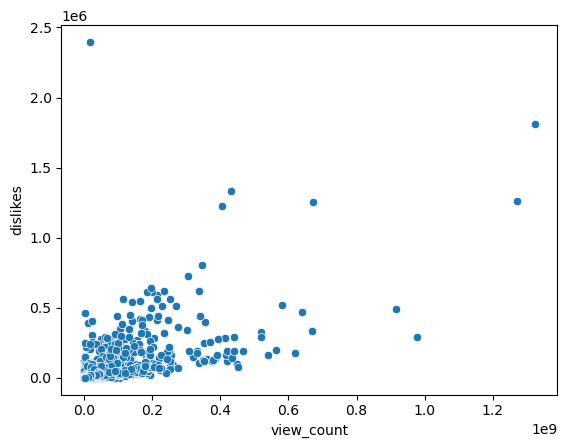

In [123]:
sns.scatterplot(data=data_copy, x='view_count', y='dislikes')

From the above plot we can infer that with increase in the views the count of dislike for the video increases. To say exacty that there is **68.45%** of chance that the count of dislike increases with the view_count 

# <font color = 'Purple'> 14. Display all the information about the videos that were published in January, and mention the count of videos that were published in January. </font>

In [124]:
jan_vids=data_copy[data_copy['published_at'].dt.month == 1]   

# using the atributes from datetime datatype to get the list of videos that were published on january

print("details of videos published on january:",jan_vids)
print("\n\n\n", jan_vids.nunique())

details of videos published on january:           video_id                                              title  \
27     -2Gwm7QfBnE                                    Q&A With Naisha   
48     -4sfXSHSxzA           SURPRISING BRENT WITH HIS TIKTOK CRUSH!!   
95     -AJD1Fc5rpQ  WE ARE HAVING A BABY! | finding out i'm pregna...   
103    -AuJiwjsmWk              Do Ugly Foods Taste Worse? Taste Test   
182    -JhqO2KWr5U                                   Schlatt gets fit   
...            ...                                                ...   
37300  zmzFL5bG-jc  DEVINE MON PERSONNAGE AVANT AKINATOR ! (c'est ...   
37329  zpzjex7qwrA  Lampard Sacked Within Days Rorys Misery | Chel...   
37345  zqyv-B6mnBM                 Lil Wayne - Ain't Got Time (Audio)   
37383  zwfu1-24T7Q  PRADA Cup Day 1 | Full Race Replay | PRADA Cup...   
37418  zziBybeSAtw  PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...   

                     channel_id       channel_title        published_at  \
27     U

The above results give the details of the videos that were published on the month january. The count of the videos that were released on january is **2099**